In [1]:
import sys
sys.path.insert(0, '/home/nuwah/2023_projects/Statistics-Handbooks') # add path to syspath where top-level of package is

In [2]:
from Regression.LinearRegression import LinearRegressionMethods
from Regression import evaluate
from DataGenerator import DataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

### Polynomial regression example
Technically, polynomial regression is a special case of Multiple Linear Regression, so we will use the same methods as linear regression to solve our parameters

<Axes: >

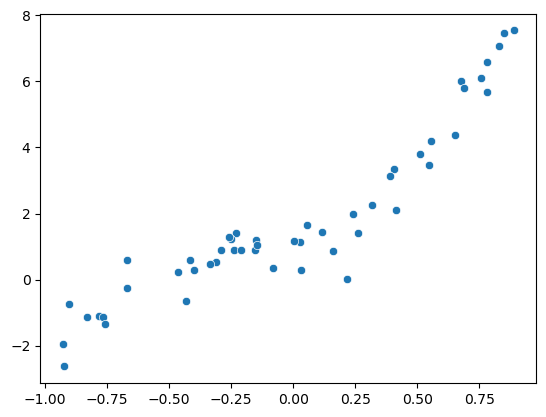

In [81]:
# Make a new DataGenerator
dg = DataGenerator(num_samples=50, domain=(-1,1), num_features=1, noise_std=0.5, seed=20) # Init data generator
p = dg.generate_polynomial(degrees=[3], coefficients=[[4,3,2,1]]) #This makes a simple quadratic y = x^2 (+0x+0)
#p = dg.generate_polynomial(degrees=[2], coefficients=[[2,5,4]]) # This makes quadratic y = 2x^2 + 5x + 4
#p = dg.generate_polynomial(degrees=[3], coefficients=[[1,0,0,0]]) # This makes simple cubic y = x^3
sns.scatterplot(x=dg.X.flatten(),y=p[1])

In [82]:
# X data
p[0]

array([[-3.28980247e-03,  2.21197330e-02, -1.48727042e-01,
         1.00000000e+00],
       [ 1.99834073e-05,  7.36398724e-04,  2.71366675e-02,
         1.00000000e+00],
       [ 1.59209889e-08,  6.32868326e-06,  2.51568743e-03,
         1.00000000e+00],
       [-7.93591659e-01,  8.57165592e-01, -9.25832378e-01,
         1.00000000e+00],
       [ 7.21119091e-02,  1.73249236e-01,  4.16232190e-01,
         1.00000000e+00],
       [ 1.39733501e-02,  5.80141179e-02,  2.40861200e-01,
         1.00000000e+00],
       [ 1.71524727e-01,  3.08710328e-01,  5.55617069e-01,
         1.00000000e+00],
       [-5.35012948e-04,  6.59036592e-03, -8.11810687e-02,
         1.00000000e+00],
       [-1.38913092e-02,  5.77868187e-02, -2.40388891e-01,
         1.00000000e+00],
       [-7.21032829e-02,  1.73235420e-01, -4.16215593e-01,
         1.00000000e+00],
       [ 1.49946153e-03,  1.31005708e-02,  1.14457725e-01,
         1.00000000e+00],
       [-5.75251141e-01,  6.91679641e-01, -8.31672797e-01,
      

In [83]:
# y (response/target) variable
p[1]

array([ 1.19769246,  1.15449498,  1.18381868, -2.62616557,  2.09824343,
        1.9915063 ,  4.19319871,  0.36602839,  0.88856586,  0.60206918,
        1.43594551, -1.13601668,  1.40834075,  7.54053169,  5.6783359 ,
        6.09341349,  0.52639603,  3.35930789,  1.64452667,  2.27443525,
        0.23502073,  0.01563238, -0.74933085,  3.14614589,  0.3001133 ,
       -0.25709592,  0.4611214 ,  0.58468496,  7.06720471, -0.66000624,
       -1.09801337, -1.12182639,  3.80591451,  6.00918927, -1.94290411,
       -1.33702803,  6.57517996,  0.28766188,  7.47050011,  0.85307102,
        3.47273035,  0.90814559,  4.37505197,  1.42341163,  0.8966    ,
        1.05909018,  0.89443371,  5.79245855,  1.22431511,  1.29234926])

In [84]:
# Instantiate linear regression object
lr = LinearRegressionMethods(p[0], p[1])

# Solve the linear regression regression by ordinary least squares
lr_ols = lr.ols()

Execution time : 872319ns == 0.000872319s


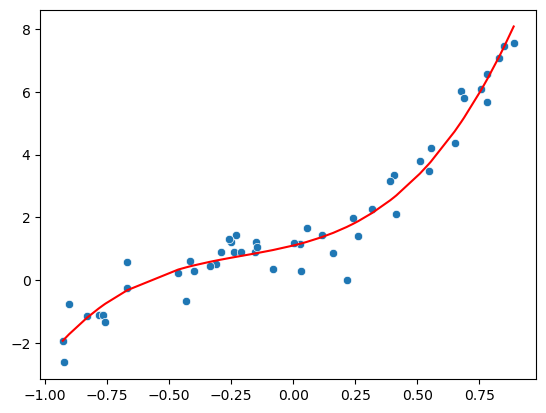

In [85]:
data = sns.scatterplot(x=dg.X.flatten(),y=p[1])
sns.lineplot(x=dg.X.flatten(), y=lr_ols.predictions, color='red')
plt.show()

In [86]:
# Access the weights learned via OLS
lr_ols.weights

array([4.42832888, 2.69764347, 1.95019556, 1.09931078])

In [87]:
# R^2 for this fit
evaluate.coefficientOfDetermination(lr_ols)

0.9555738037193564

In [88]:
# Solve the linear regression regression by gradient descent 
lr = LinearRegressionMethods(p[0], p[1])
lr_mse_gd = lr.mse_gradient_descent()

Execution time : 10780304ns == 0.010780304s


In [89]:
# Access the weights learned by MSE Gradient Descent
lr_mse_gd.weights

array([2.89889615, 2.44543234, 2.82507628, 0.583594  ])

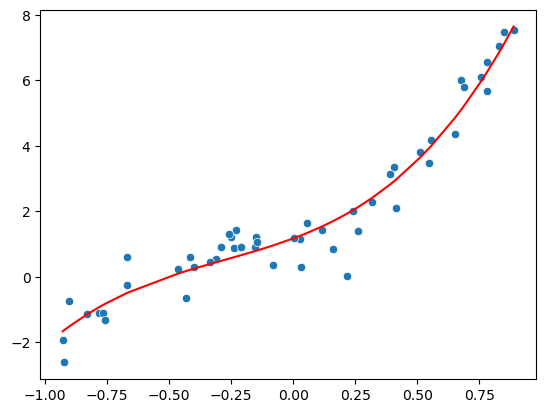

In [90]:
data = sns.scatterplot(x=dg.X.flatten(),y=p[1])
sns.lineplot(x=dg.X.flatten(), y=lr_mse_gd.predictions, color='red')
plt.show()

In [91]:
# R^2 for this fit
evaluate.coefficientOfDetermination(lr_mse_gd)

0.9498922385489879